# KAN Visuals

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/KAN/Repo

/content/drive/MyDrive/KAN/Repo


In [3]:
!pip install -e .

Obtaining file:///content/drive/MyDrive/KAN/Repo
  Preparing metadata (setup.py) ... done
  Running setup.py develop for pykan


In [1]:
!pip install sympy

## Imports

In [4]:
from kan import KAN
from kan import MultKAN
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import yaml
import os
from torchvision import transforms
from kan.spline import B_batch


In [5]:
os.makedirs('/pictures', exist_ok=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## Data Load and first look

In [6]:
# read train and test data
train = pd.read_csv('/content/drive/MyDrive/KAN/mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/KAN/mnist_test.csv')

In [7]:

test_1 = test.drop('label', axis=1).values
test_1 = torch.tensor(test_1, dtype=torch.float32)

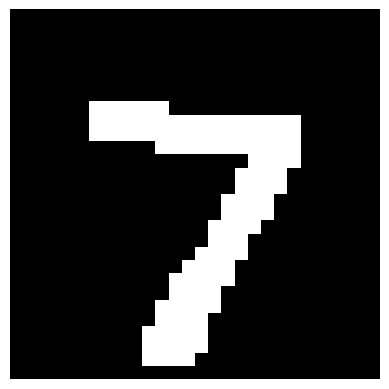

In [8]:

# Tensor in ein 8x8-Bild umformen
tensor = test_1[0].view(28, 28)

# Tensor in NumPy-Array umwandeln
image_array = tensor.numpy()

# Bild mit Matplotlib anzeigen
plt.imshow(image_array, cmap='gray', vmin=0, vmax=1)
plt.axis('off')  # Achsen ausschalten
plt.show()

## Data transform

In [9]:

# convert data to numpy arrays
x_train = train.drop('label', axis=1).values
x_test = test.drop('label', axis=1).values
y_train = train['label'].values
y_test = test['label'].values

# set target size to scale images
target_size = 8

# define transformation
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((target_size, target_size)),
    transforms.ToTensor()
])

# transform the data
def transform_images(images):
    transformed_images = []
    for image in images:
        image = image.reshape(28, 28).astype(np.uint8)
        image = transform(image)
        image = image.view(-1)
        transformed_images.append(image)
    return torch.stack(transformed_images)

train_input = transform_images(x_train)
test_input = transform_images(x_test)
train_label = torch.tensor(y_train, dtype=torch.int64)
test_label = torch.tensor(y_test, dtype=torch.int64)

dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

# Convert labels to Long tensors
dataset['train_label'] = dataset['train_label'].long()
dataset['test_label'] = dataset['test_label'].long()

dataset['train_input'] = train_input.to(device)
dataset['test_input'] = test_input.to(device)
dataset['train_label'] = train_label.to(device)
dataset['test_label'] = test_label.to(device)

## Show first prprocessed picture

In [10]:
#first test label
dataset['test_label'][0]

tensor(7)

In [11]:
#first test input
dataset['test_input'][0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0196, 0.0706, 0.0275, 0.0157, 0.0157, 0.0039, 0.0000, 0.0000, 0.1255,
        0.4471, 0.4588, 0.4588, 0.4902, 0.1176, 0.0000, 0.0000, 0.0078, 0.0275,
        0.0706, 0.1725, 0.5451, 0.0902, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
        0.3176, 0.3255, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373, 0.5020,
        0.0706, 0.0000, 0.0000, 0.0000, 0.0000, 0.0314, 0.4980, 0.2549, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0902, 0.5020, 0.0784, 0.0000, 0.0000,
        0.0000])

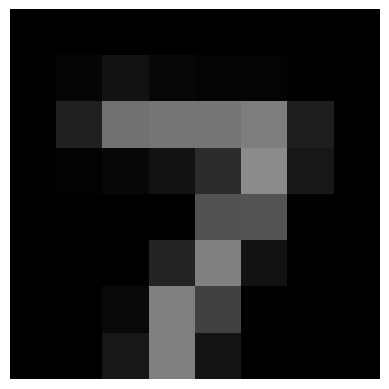

In [12]:
tensor = dataset['test_input'][0]
# Tensor in ein 8x8-Bild umformen
tensor = tensor.view(8, 8)

# Tensor in NumPy-Array umwandeln
image_array = tensor.numpy()

# Bild mit Matplotlib anzeigen
plt.imshow(image_array, cmap='gray', vmin=0, vmax=1)
plt.axis('off')  # Achsen ausschalten
plt.show()

## Loading Model

In [13]:
#Parameter
hidden_1 = 1
hidden_2 = 0
steps = 10
grid = 3
k = 3
seed = 42
input_dim = train_input.shape[ 1 ]   # Anzahl der Eingabefunktionen
output_dim = 10   # Anzahl der Klasse

In [14]:
model = KAN(width=[input_dim, hidden_1, output_dim], grid= grid , k= k , seed= seed)  # Vereinfachte Modellkonfiguratio5

checkpoint directory created: ./model
saving model version 0.0


In [15]:
model = model.loadckpt("/content/drive/MyDrive/KAN/Modelle/model_mnist_h_3_s_45_g_3_k_3")

## Show Model

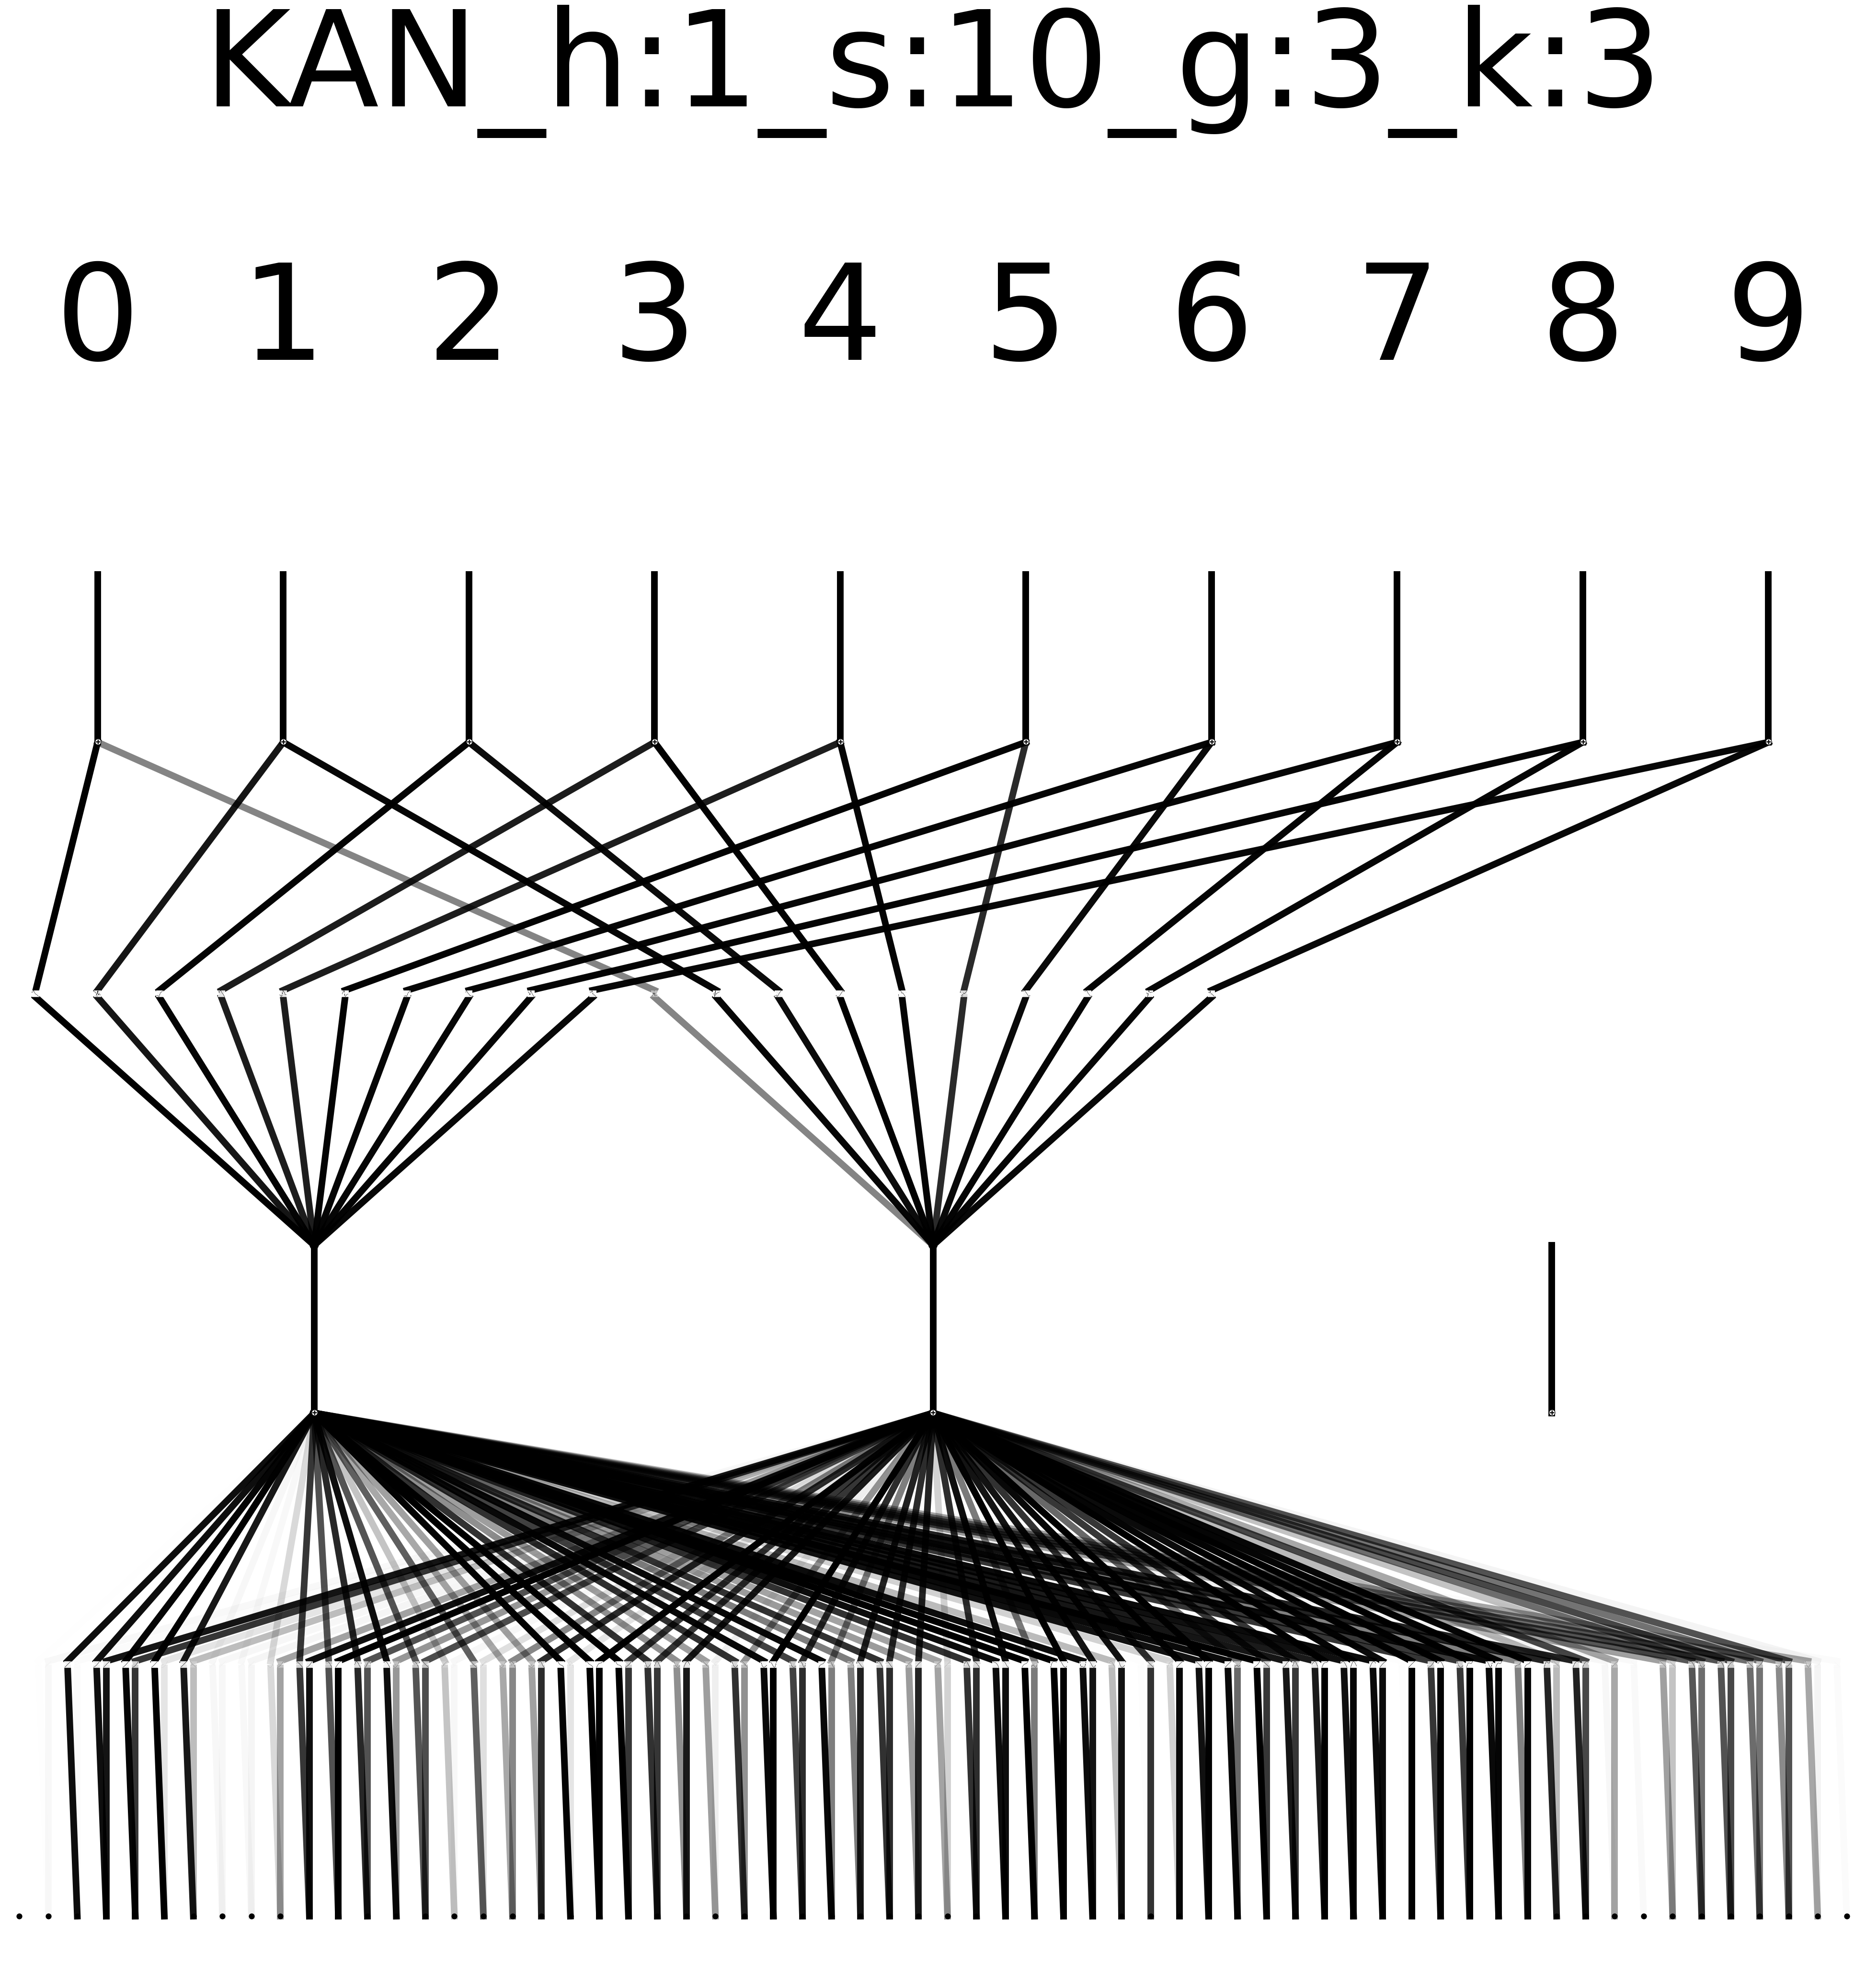

In [17]:
model.plot(beta=3, scale=5,folder="/pictures", out_vars=['0','1','2','3','4','5','6','7','8','9'], title = f"KAN_h:{hidden_1}_s:{steps}_g:{grid}_k:{k}")

## Preparing for Model Test

In [ ]:
dataset['test_label'][0]

In [ ]:
test_input_1 = dataset['test_input'][:1]

In [ ]:
torch.argmax(model(test_input_1))

In [ ]:
model(test_input_1)

## Visual activation weights 20 samples

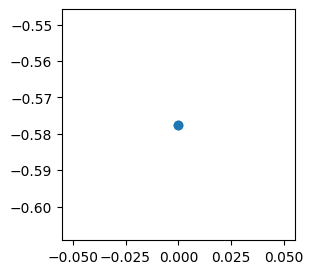

In [26]:
#model(dataset['test_input'][:20])
layer = 0
layer_horizontal = 2
number_out = 0
x, y = model.get_fun(layer,layer_horizontal,number_out)

## Grids

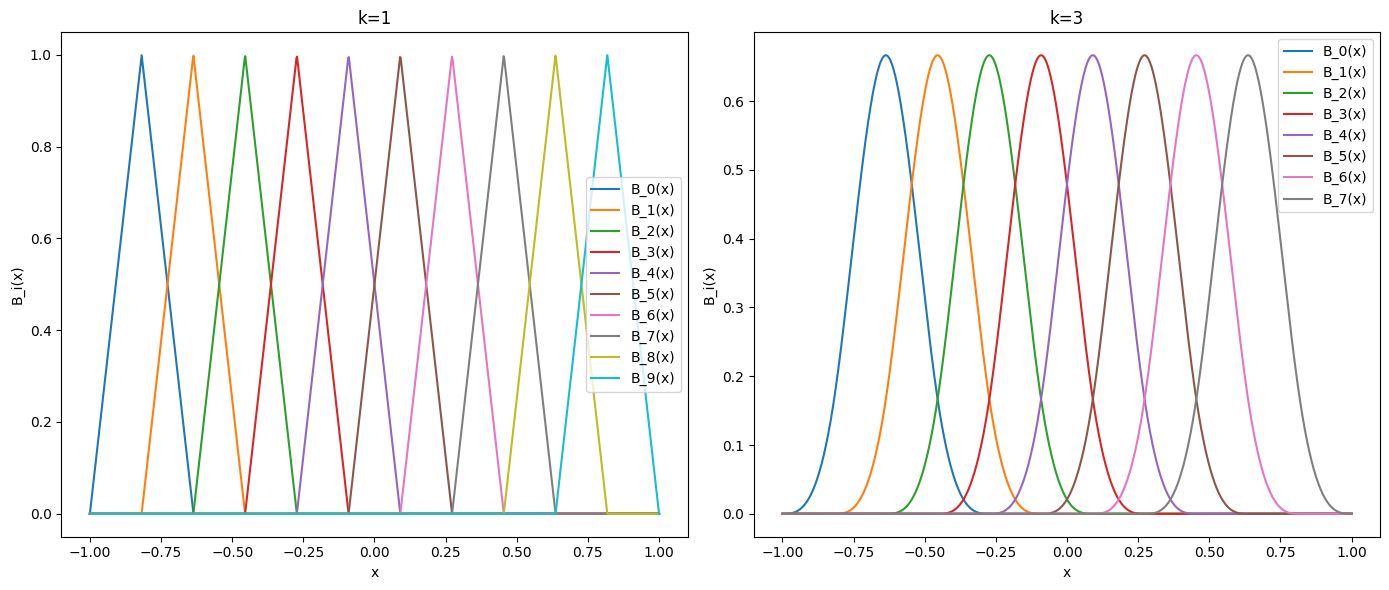

In [20]:
# consider a 1D example.
# Suppose we have grid in [-1,1] with G intervals, spline order k
G = 11

# create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot with k=1
k1 = 1
grid1 = torch.linspace(-1,1,steps=G+1)[None,:]
x = torch.linspace(-1,1,steps=1001)[None,:]
basis1 = B_batch(x, grid1, k=k1)

for i in range(G-k1):
    axes[0].plot(x[0].detach().numpy(), basis1[0,:,i].detach().numpy())

axes[0].legend(['B_{}(x)'.format(i) for i in np.arange(G-k1)])
axes[0].set_title('k=1')
axes[0].set_xlabel('x')
axes[0].set_ylabel('B_i(x)')

# Second plot with k=3
k3 = 3
grid3 = torch.linspace(-1,1,steps=G+1)[None,:]
basis3 = B_batch(x, grid3, k=k3)

for i in range(G-k3):
    axes[1].plot(x[0].detach().numpy(), basis3[0,:,i].detach().numpy())

axes[1].legend(['B_{}(x)'.format(i) for i in np.arange(G-k3)])
axes[1].set_title('k=3')
axes[1].set_xlabel('x')
axes[1].set_ylabel('B_i(x)')

plt.tight_layout()
plt.show()


## All inputs

In [ ]:
model(dataset['test_input'])
model.plot(beta=3, scale=2,folder="/kaggle/working/pictures", out_vars=['0','1','2','3','4','5','6','7','8','9'], title = f"KAN_test_inputs_all")

## One Input repeat

In [29]:
dataset['test_input'][:1]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0196, 0.0706, 0.0275, 0.0157, 0.0157, 0.0039, 0.0000, 0.0000, 0.1255,
         0.4471, 0.4588, 0.4588, 0.4902, 0.1176, 0.0000, 0.0000, 0.0078, 0.0275,
         0.0706, 0.1725, 0.5451, 0.0902, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
         0.3176, 0.3255, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373, 0.5020,
         0.0706, 0.0000, 0.0000, 0.0000, 0.0000, 0.0314, 0.4980, 0.2549, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0902, 0.5020, 0.0784, 0.0000, 0.0000,
         0.0000]])

In [40]:
# Originaler Tensor
original_tensor = dataset['test_input'][:1]

# Wiederhole den Tensor 5-mal entlang einer neuen Dimension
repeated_tensor = original_tensor.repeat(2, 1)

In [31]:
result = torch.cat((dataset['test_input'], repeated_tensor), dim=0)

In [37]:
result[-1]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0196, 0.0706, 0.0275, 0.0157, 0.0157, 0.0039, 0.0000, 0.0000, 0.1255,
        0.4471, 0.4588, 0.4588, 0.4902, 0.1176, 0.0000, 0.0000, 0.0078, 0.0275,
        0.0706, 0.1725, 0.5451, 0.0902, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
        0.3176, 0.3255, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373, 0.5020,
        0.0706, 0.0000, 0.0000, 0.0000, 0.0000, 0.0314, 0.4980, 0.2549, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0902, 0.5020, 0.0784, 0.0000, 0.0000,
        0.0000])

In [41]:
model(repeated_tensor)

tensor([[ 5.9730, -0.0889, -2.3650,  0.4631, -6.5989,  3.8231,  0.5578,  8.3736,
         -0.6308,  0.0696],
        [ 5.9730, -0.0889, -2.3650,  0.4631, -6.5989,  3.8231,  0.5578,  8.3736,
         -0.6308,  0.0696]], grad_fn=<AddBackward0>)

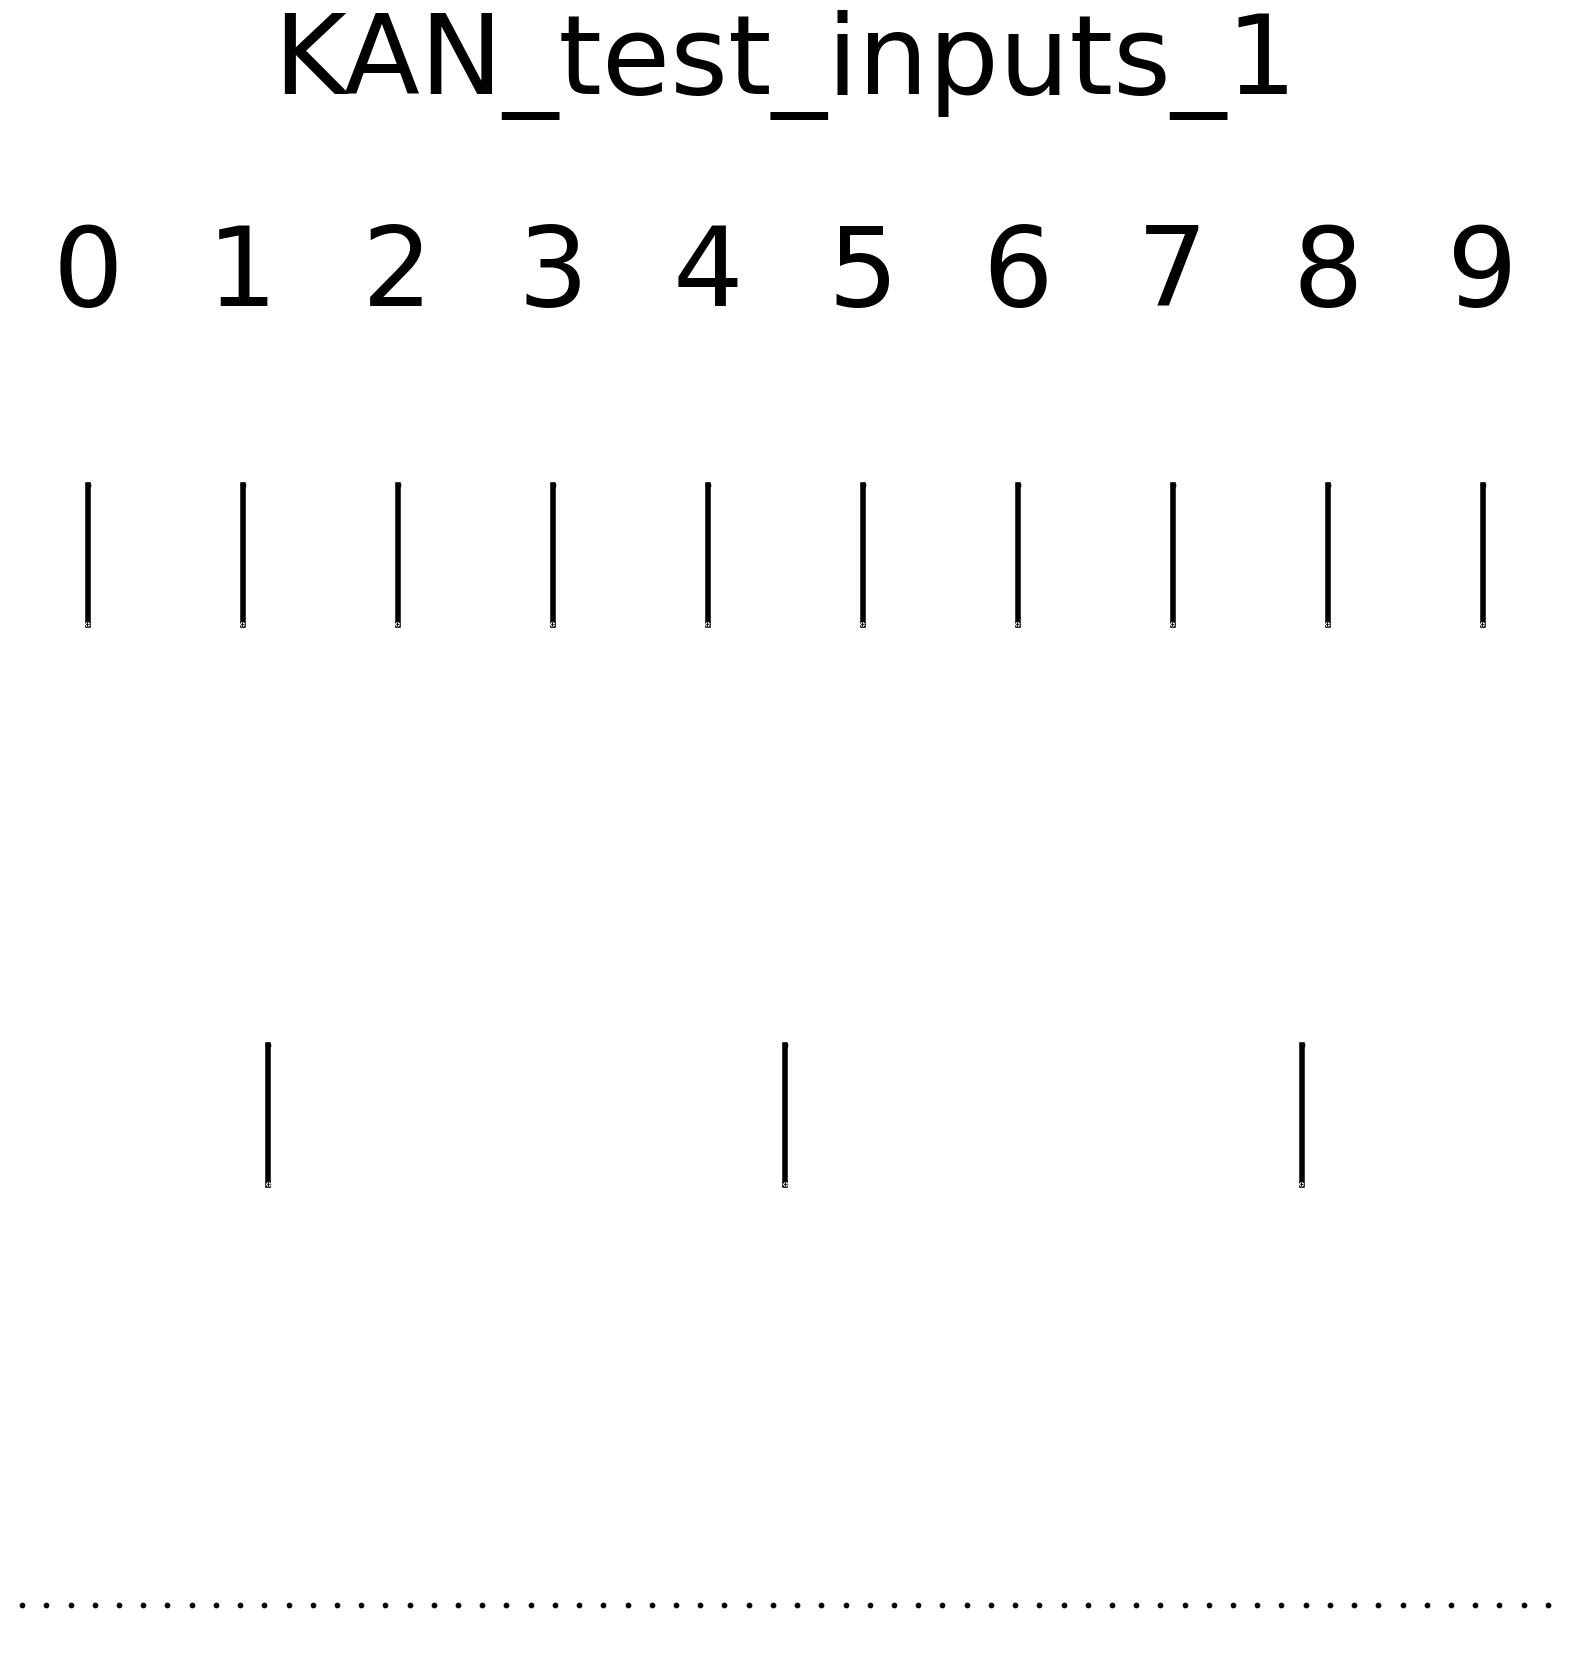

In [44]:
model.plot(beta= 3, scale=2,folder="/pictures", out_vars=['0','1','2','3','4','5','6','7','8','9'], title = f"KAN_test_inputs_1")

## Input axses


In [ ]:
model(dataset['test_input'])
model.plot(beta=3, scale=2,folder="/kaggle/working/pictures", out_vars=['0','1','2','3','4','5','6','7','8','9'], title = f"KAN_with axes")
n = 8*8
for i in range(n):
    plt.gcf().get_axes()[0].text(1/(2*n)+i/n-0.005,-0.02,train.keys()[1:-1][i], rotation=270, rotation_mode="anchor")